# Coordinate Transformation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Rotational

Rotate about x-axis.

$$
R_x(\theta) = \begin{bmatrix}
1 & 0 & 0 \\
0 & \cos(\theta) & -\sin(\theta) \\
0 & \sin(\theta) & \cos(\theta)
\end{bmatrix}
$$

In [2]:
def rotation_x(radian):
    sin = np.sin(radian)
    cos = np.cos(radian)
    return np.array([
        [1.0, 0.0, 0.0],
        [0., cos, -sin],
        [0.0, sin, cos],
    ])

Rotate about y-axis.

$$
R_y(\theta) = \begin{bmatrix}
\cos(\theta) & 0 & \sin(\theta) \\
0 & 1 & 0 \\
-\sin(\theta) & 0 & \cos(\theta)
\end{bmatrix}
$$



In [3]:
def rotation_y(radian):
    sin = np.sin(radian)
    cos = np.cos(radian)
    return np.array([
        [cos, 0.0, sin],
        [0.0, 1.0, 0.0],
        [-sin, 0., cos],
    ])

Rotate about z-axis.

$$
R_z(\theta) = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0  \\
0 & 0 & 1
\end{bmatrix}
$$

In [4]:
def rotation_z(radian):
    sin = np.sin(radian)
    cos = np.cos(radian)
    return np.array([
        [cos, -sin, 0.0],
        [sin, cos, 0.0],
        [0.0, 0.0, 1.0],
    ])

## Translational

Translate along 3 dimensions.

$$
\Delta = \begin{bmatrix}
\Delta x \\ \Delta y \\ \Delta z
\end{bmatrix}
$$

In [5]:
def translation(dx, dy, dz):
    return np.array([[dx, dy, dz]]).T

## Transformation Matrix

Coordinate transformation is **NOT** commutative. It makes a difference when we rotate about an axis first then translate, versus translate first then rotate about an axis. Also order of rotation matters.
$$
R \in \mathbb{R}^3 = R_x R_y R_z \neq R_y R_x R_z
$$

In [6]:
radian = 30 * (np.pi / 180)
np.allclose(
    rotation_x(radian) @ rotation_y(radian) @ rotation_z(radian),
    rotation_y(radian) @ rotation_x(radian) @ rotation_z(radian),
)

False

$$
T = \begin{bmatrix}
R_{11} & R_{12} & R_{13} & \Delta_{11} \\
R_{21} & R_{22} & R_{23} & \Delta_{21} \\
R_{31} & R_{32} & R_{33} & \Delta_{31} \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

In [7]:
def transformation(R, D):
    transform = np.concatenate([R, T], axis=1)
    return np.concatenate([transform, np.array([[0, 0, 0, 1]])], axis=0)

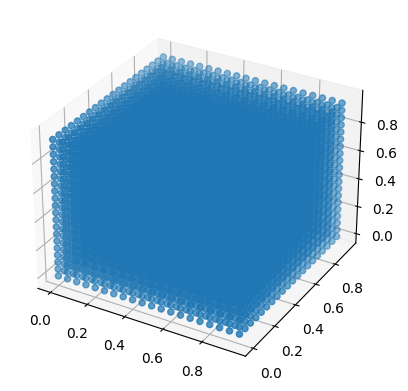

In [8]:
x_ = np.arange(0, 1, 0.05)
y_ = np.arange(0, 1, 0.05)
z_ = np.arange(0, 1, 0.05)
x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x.flatten(), y.flatten(), z.flatten())

In [9]:
coordinates = np.concatenate([
    x.reshape(1, -1),
    y.reshape(1, -1),
    z.reshape(1, -1),
    np.ones(8000).reshape(1, -1)
], axis=0)
coordinates.shape

(4, 8000)

<Axes3DSubplot:xlabel='x-axis', ylabel='y-axis'>

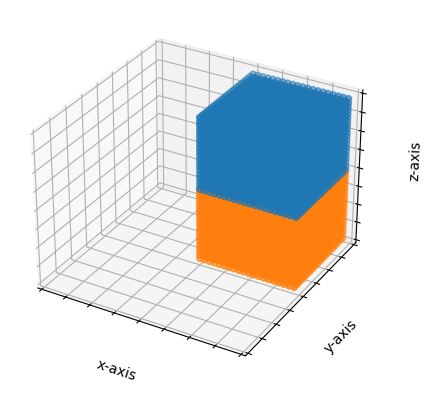

In [10]:
radian_per_deg = np.pi / 180
R = rotation_x(-90 * radian_per_deg) @ rotation_y(0 * radian_per_deg) @ rotation_z(0 * radian_per_deg)
T = translation(0, 0, 0)
new_coordinates = transformation(R, T) @ coordinates
new_x, new_y, new_z = new_coordinates[0, :], new_coordinates[1, :], new_coordinates[2, :]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x.flatten(), y.flatten(), z.flatten())
ax.scatter(new_x, new_y, new_z)

ax.set_xlabel('x-axis')
ax.set_xlim(-1, 1)
ax.set_xticklabels([])

ax.set_ylabel('y-axis')
ax.set_ylim(-1, 1)
ax.set_yticklabels([])

ax.set_zlabel('z-axis')
ax.set_zlim(-1, 1)
ax.set_zticklabels([])

ax